<a id='intro'></a>
## Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning
#### Convert the 'release_date' column to datetime
> Parsing the column using the typical parse_dates argument of pd.read_csv or the pd.to_datetime function does not work properly. The reason being that the column contains years in the 1900s, and Python assumes all years are in the 21st century, resulting in incorrectly parsed future years. I will have to correctly identify and fix the problematic years before parsing the column.
* Create a boolean mask to locate problematic years
* Correctly label the dates
* Parse the column to datetime

#### Columns to drop
> I will drop the __budget__ and __revenue__ columns and use their adjusted values instead

> I will drop all columns except for the following, which I will be using for my analysis:
* [__original_title__, __cast__, __director__, __genres__, __production_companies__, __release_date__, __vote_average__, __release_year__, __budget__]

> I will drop all null values

> I will drop rows with zeros in relevant columns I will be analysing
* __vote_average__, __budget__, __revenue__



In [3]:
# Python does not properly parse certain years (ex: 1-1-66 gets parsed as 2066-1-1)
# Include a '19' in front of all years in the 1900's to clearly indicate the century
from datetime import datetime

# Boolean mask for years in the 1900's
incorrect_dates = df['release_year'] < 2000
# Correct the dates
df.loc[incorrect_dates,'release_date'] = df[incorrect_dates]['release_date'].apply(lambda x: x[:-2] + '19' + x[-2:])
# Parse release_date column
df['release_date'] = pd.to_datetime(df['release_date'])

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# Drop budget and revenue column
df.drop(columns=['budget','revenue'], inplace=True)
# Rename budget_adj column to budget
df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'}, inplace=True)

# List of columns to keep ['original_title','cast','director','genres','production_companies','release_date','vote_average','release_year','budget']
keep_list = ['original_title','cast','director','genres','production_companies','release_date','vote_average','budget','revenue']
# Update DataFrame
df = df[keep_list]

# Change all values of 'nan' to null values, then drop rows with null values
df.replace('nan', np.nan, inplace=True)
df.dropna(subset=['original_title','cast','director','genres','production_companies','release_date'], inplace=True)

# Drop rows with zeros in relevant columns
df = df.loc[df[['vote_average','budget','revenue']].ne(0).all(axis=1)]

# Replace zeros with the mean in relevant columns
'''
df['vote_average'] = df['vote_average'].replace(0, df.vote_average.mean())
df['budget'] = df['budget'].replace(0, df.budget.mean())
df['revenue'] = df['revenue'].replace(0, df.revenue.mean())
'''

df.head()

,original_title,cast,director,genres,production_companies,release_date,vote_average,budget,revenue
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,1.379999e+08,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,1.839999e+08,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,1.747999e+08,1.385749e+09


In [6]:
df.shape

(3806, 9)

<a id='eda'></a>
## Exploratory Data Analysis

### Which months are the best times to view movies?
#### Description:
> Determine which months have the highest average rating, view the median number of movies released each month, and determine the average budget for movies by their release month.

#### Procedure:
> 
1. Plot the average rating vs. release month
  1. Create a copy of the DataFrame and name it __rating_by_month__
  2. Convert the __release_date__ column to numerical representations of the month
  3. Group by __release_date__, then find the mean of the __vote_average__, and plot the values
2. Plot the median number of movies each month
  1. Create a copy of the DataFrame with the index set to __release_date__ and name it __monthly_count__
  2. Resample the __monthly_count__ DataFrame by month, and count the number of movies that appear each month
  3. Drop the months with zero movies
  4. Reset the index
  5. Convert the __release_date__ column to numerical representations of the month
  6. Group by __release_date__, then find the median number of movies for each month, and plot as a bar chart
3. Plot the average budget vs. release_month
  1. Create a copy of the DataFrame and name it __budget_info__
  2. Convert the __release_date__ column to numerical representations of the month
  3. Group by __release_date__, then find the mean of the __budget__, and plot the values

##### 1. Plot the average rating vs. release month
##### 2. Plot the median number of movies each month
##### 3. Plot the average budget vs. release_month

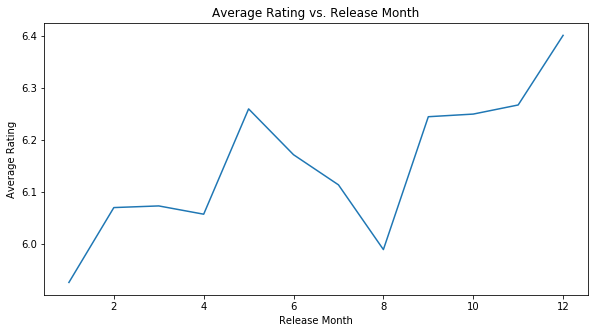

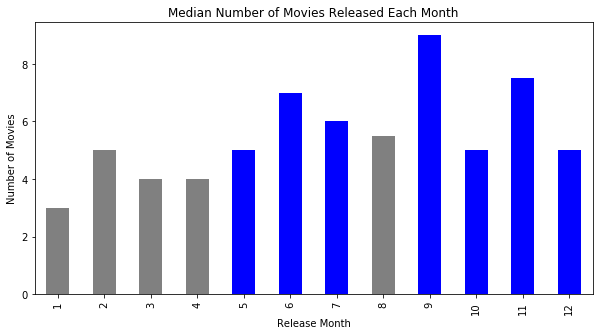

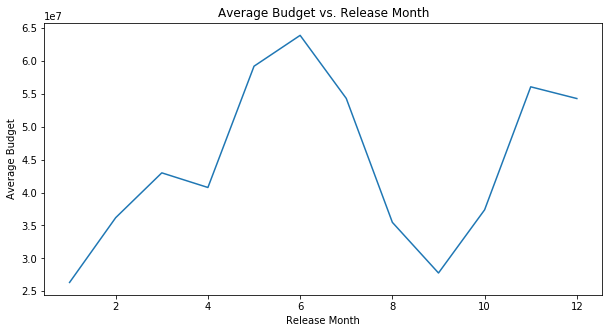

In [7]:
# Plot the average rating vs. release month
plt.figure
rating_by_month = df.copy()
rating_by_month['release_date'] = rating_by_month['release_date'].dt.month
rating_by_month.groupby('release_date')['vote_average'].mean().plot(figsize=(10,5))
plt.subplots_adjust(left = 0.145)
plt.title('Average Rating vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Rating')
plt.show()

# Plot the median number of movies each month
plt.figure
monthly_count = df.set_index('release_date')
monthly_count = monthly_count.resample('M').count()
monthly_count = monthly_count.loc[monthly_count.ne(0).all(axis=1)]
monthly_count = monthly_count.reset_index()
monthly_count['release_date'] = monthly_count['release_date'].dt.month
standout = ['grey','grey','gray','grey','b','b','b','grey','b','b','b','b']
monthly_count.groupby('release_date')['original_title'].median().plot(kind='bar', color=standout, figsize=(10,5))
plt.title('Median Number of Movies Released Each Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.show()

# Plot the average budget vs. release_month
plt.figure
budget_info = df.copy()
budget_info['release_date'] = budget_info['release_date'].dt.month
budget_info.groupby('release_date')['budget'].mean().plot(figsize=(10,5))
plt.title('Average Budget vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Budget');

### Which actors, directors, and production companies produce the best movies by genre?
#### Description:
> I would like to find the top 10 actors/directors/production_companies by genre.

#### Procedure:
> 
1. Preliminary steps:
  1. Write a function to expand each of these columns, as each row contains multiple values
  2. Expand the columns
2. Find the top 10 actors by genre
  1. Group by the __genres__ and __cast__ column, then find the mean of the __vote_average__ column
  2. Take the previous groupby object, groupby the __genres__ colum, then find the top 10 values from the __vote_average__ column
3. Find the top 10 directors by genre
  1. Group by the __genres__ and __director__ column, then find the mean of the __vote_average__ column
  2. Take the previous groupby object, groupby the __genres__ colum, then find the top 10 values from the __vote_average__ 
4. Find the top 10 production companies by genre
  1. Group by the __genres__ and __production_companies__ column, then find the mean of the __vote_average__ column
  2. Take the previous groupby object, groupby the __genres__ colum, then find the top 10 values from the __vote_average__ 

##### 1. Preliminary steps:

In [8]:
# Function to expand columns with multiple values
def expand(df_in, column, sep='|'):
    """
    !!! IMPORTANT !!! : 
        df_in MUST HAVE NO NULL VALUES
    !!! IMPORTANT !!!
    
    Split the values of a column and expand so the new
    DataFrame has one row per value.
    """
    indexes = list()
    new_values = list()
    # Find all rows, and column values to expand
    for i, presplit in enumerate(df_in[column]):
        # Expand the column values and store
        values = presplit.split(sep)
        new_values += values
        # Duplicate the row index and store
        indexes += [i] * len(values)
    # Copy of the original DataFrame with duplicate
     # rows to match expanded column
    df_out = df_in.iloc[indexes, :].copy()
    # Replace the column with the expanded values
    df_out[column] = new_values
    # Renumber the index
    df_out.index = list(range(len(df_out)))
    
    return df_out

In [9]:
# Test to see it can properly expand the columns

# Columns to expand
expand_columns = ['cast','director', 'genres','production_companies']

# Create a new dataframe
test = df.copy()
# Loop through all columns
count = 0
for column in expand_columns:
    test = expand(test,column)
    if not test[column].str.contains("\|").any():
        count += 1
    # Check to see it worked
    # Should print, "Properly expanded!"
    if count == 4:
        print('Properly expanded!')

Properly expanded!


In [10]:
# Expand the genres column, and store in a new DataFrame
expand_genres = expand(df.copy(), 'genres')

# Create a new DataFrame for each attribute and expand the corresponding column
cast_genres = expand(expand_genres, 'cast')
dir_genres = expand(expand_genres, 'director')
prod_genres = expand(expand_genres, 'production_companies')

# Create a list of all the genres
genres_list = sorted(list(expand_genres['genres'].unique()))

##### 2. Find the top 500 actors by genre

In [11]:
# Find the top 10 actors by genre
cast_averages = pd.DataFrame(cast_genres.groupby(['genres', 'cast'])['vote_average'].mean())
find_top_10 = cast_averages['vote_average'].groupby(level=0, group_keys=False)
top_10_cast = pd.DataFrame(find_top_10.nlargest(500)).reset_index()

#for genre in genres_list:
#    print(top_10_cast.loc[top_10_cast['genres'] == genre])
#    print('\n')

##### 3. Find the top 500 directors by genre

In [12]:
# Find the top 10 directors by genre
dir_averages = pd.DataFrame(dir_genres.groupby(['genres', 'director'])['vote_average'].mean())
find_top_10 = dir_averages['vote_average'].groupby(level=0, group_keys=False)
top_10_dir = pd.DataFrame(find_top_10.nlargest(500)).reset_index()

#for genre in genres_list:
#    print(top_10_dir.loc[top_10_dir['genres'] == genre])
#    print('\n')

##### 4. Find the top 500 production companies by genre

In [13]:
# Find the top 10 production companies by genre
prod_averages = pd.DataFrame(prod_genres.groupby(['genres', 'production_companies'])['vote_average'].mean())
find_top_10 = prod_averages['vote_average'].groupby(level=0, group_keys=False)
top_10_prod = pd.DataFrame(find_top_10.nlargest(500)).reset_index()

#for genre in genres_list:
#    print(top_10_prod.loc[top_10_prod['genres'] == genre])
#    print('\n')

<a id='eda'></a>
## Modeling

### Preprocessing
#### Description:
> Create boolean columns aka *dummy variables* for the **cast**, **director**, **production_companies**, and **genres** columns to fit the data to a linear regression model.

> Transform the **release_date** column into numerical representations of month to include it in the model as well.

#### Procedure:
> 
1. Replace the **cast**, **director**, **and production_companies** columns with dummy variables depending on whether or not the movie has a value in the top 10 feature for the movie's genre. <div class="alert alert-block alert-info"> (E.g. An action movie will have a value of 1 in the cast column if it has an actor in the top 10 list of action movies) </div>
  1. Loop through the features and their corresponding DataFrames
    1. Split the feature column into a list using the .split() method
  2. Loop through the genres
    1. Find all movies in correspondence with the top 10 of the current feature for the current genre
2. Create dummy variables for each genre in the **genres** column
  1. Use pd.get_dummies() to create dummy variables
  2. Drop the original genres column
3. Collapse the DataFrame back to one movie per row
  1. Collapse genre features
    1. Groupby **original_title** and **release_date**, then sum the genre columns
  2. Collapse remaining features
    2. Groupby **original_title** and **release_date**, then find the unique values for the remaining columns
4. Convert the **release_date**s into months
  1. Use the dt.month method to convert the column into integer values of month

##### 1. Replace the **cast**, **director**, **and production_companies** columns with dummy variables

In [14]:
# List of features
features = ['cast', 'director', 'production_companies']
# List of dataframes
dataframes = [top_10_cast, top_10_dir, top_10_prod]
# Counter to cycle through features and dataframes
count = 0 
# Copy the expand_genres DataFrame
model_df = expand_genres[expand_genres.columns]

# Loop through the features and their corresponding DataFrames
for i in range(3):
    feature = features[i]
    data =  dataframes[i]
    # Split the feature column
    model_df[feature] = model_df[feature].apply(lambda x: x.split('|'))
    
    # Loop through the genres
    for genre in genres_list:
        # Top 10 of the current feature for the current genre
        top_10 = list(data.loc[data['genres'] == genre, feature])

        # Find all movies with a top_10 feature for the current genre
        temp = model_df.loc[model_df.genres == genre, feature].apply(lambda values: any(hit in values for hit in top_10)).astype(int)
        
        # Update the dataframe
        model_df.loc[model_df.genres == genre, feature] = temp

# Check the DataFrame to confirm changes
model_df.head(3)

,original_title,cast,director,genres,production_companies,release_date,vote_average,budget,revenue
0,Jurassic World,1,1,Action,1,2015-06-09,6.5,1.379999e+08,1.392446e+09
1,Jurassic World,1,1,Adventure,1,2015-06-09,6.5,1.379999e+08,1.392446e+09
2,Jurassic World,1,1,Science Fiction,1,2015-06-09,6.5,1.379999e+08,1.392446e+09


##### 2. Create dummy variables for each genre in the **genres** column

In [15]:
# Create dummy variables
model_df[genres_list] = pd.get_dummies(model_df['genres'])
# Drop the original 'genres' column
model_df.drop(columns='genres', inplace=True)

# Check the DataFrame to confirm changes
model_df.head(3)

,original_title,cast,director,production_companies,release_date,vote_average,budget,revenue,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Jurassic World,1,1,1,2015-06-09,6.5,1.379999e+08,1.392446e+09,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Jurassic World,1,1,1,2015-06-09,6.5,1.379999e+08,1.392446e+09,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Jurassic World,1,1,1,2015-06-09,6.5,1.379999e+08,1.392446e+09,0,0,...,0,0,0,0,0,1,0,0,0,0


##### 3. Collapse the DataFrame back to one movie per row

In [16]:
# Collapse the genre features back to one movie per row
genre_features = model_df.groupby(['original_title', 'release_date'])[genres_list].sum().reset_index()

# Collapse the remaining features back to one movie per row
agg_dict = {'cast':'unique', 'director':'unique', 'production_companies':'unique', 'vote_average':'unique', 'budget':'unique'}
remaining_features = model_df.groupby(['original_title', 'release_date']).agg(agg_dict)
remaining_features = remaining_features.apply(lambda column: column.apply(lambda value: value[0]))

# Join the features
model_df = genre_features.join(remaining_features, on=['original_title', 'release_date'])

# Check the DataFrame to confirm changes
model_df.head(3)

,original_title,release_date,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Science Fiction,TV Movie,Thriller,War,Western,cast,director,production_companies,vote_average,budget
0,(500) Days of Summer,2009-07-17,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,1,7.3,7.623003e+06
1,10 Things I Hate About You,1999-03-30,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,1,7.2,2.094485e+07
2,"10,000 BC",2008-02-22,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,5.2,1.063426e+08


##### 4. Convert the **release_date**s into months

In [17]:
# Convert release dates to month
model_df['release_date'] = model_df['release_date'].dt.month

# Check the DataFrame to confirm changes
model_df.head(3)

,original_title,release_date,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Science Fiction,TV Movie,Thriller,War,Western,cast,director,production_companies,vote_average,budget
0,(500) Days of Summer,7,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,1,7.3,7.623003e+06
1,10 Things I Hate About You,3,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,1,7.2,2.094485e+07
2,"10,000 BC",2,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,5.2,1.063426e+08


### Fitting the Linear Regression Model
#### Description:
> Fit the data to a linear regression model using OLS (Ordinary Least Squares)

#### Procedure:
> Using the **cast**, **director**, **production_companies**, **release_date**, **budget**, and the **genres** columns as the features and the **vote_average** column as the target, split the data into training and test sets. Fit the model to the training set, and use the fitted model to predict the average rating.
1. Split the data into training and test sets
  1. Split the DataFrame into two variables, X for the features, and y for the target
  2. Use the train_test_split function to split the data into a training set, and a test set
  3. Standardize the features of the training and test sets
2. Fit the model to the training set using the OLS class from statsmodels.regression.linear_model
3. Evaluate model performance
  1. Plot the ratings vs their predictions
  2. View the error statistics
  3. View statistics for each score

##### 1. Split the data into training and test sets

In [18]:
# Variable to hold feature data
X = model_df.drop(columns=['original_title', 'vote_average'])


# Variable to hold target data
y = model_df['vote_average']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
temp = StandardScaler().fit(X_train)
X_train = temp.transform(X_train)
X_test = temp.transform(X_test)

##### 2. Fit the model to the training set

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
pca = PCA(5).fit(X_train)
model = LinearRegression()
results = model.fit(X_train, y_train)

##### 3. Evaluate model performance

R^2 (Training): 0.5162333330957887
R^2 (Test): 0.4846010859861668
MSE: 0.30967040379681565


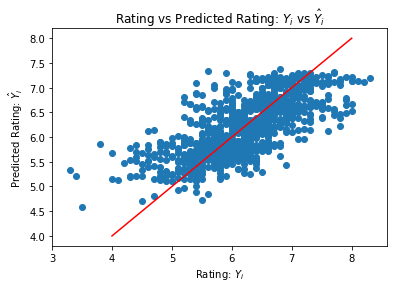

In [91]:
# Results using sklearn
y_pred = results.predict(X_test)

# Print the R^2 score
print('R^2 (Training): {}'.format(results.score(X_train, y_train)))
print('R^2 (Test): {}'.format(results.score(X_test, y_test)))

# Print the mean squared error
from sklearn.metrics import mean_squared_error
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

# Plot the Rating vs. Predicted Rating
plt.plot([4,8],[4,8], color='red')
plt.scatter(y_test, y_pred)
plt.xlabel("Rating: $Y_i$")
plt.ylabel("Predicted Rating: $\hat{Y}_i$")
plt.title("Rating vs Predicted Rating: $Y_i$ vs $\hat{Y}_i$");

> These predicted values have an $R^2$ score of 48.46%. Numerically speaking this isn't the best score; but by looking at the plot above, it seems that the model is doing a decent job. Furthermore, the model produces a Mean Squared Error of 0.309, which is quite low. 

> Lets explore the error some more.

In [108]:
# Create temporary DataFrame of Real Scores and Predicted Scores
vote_comparison = pd.DataFrame({'Real_Score': list(y_test), 'Predicted_Score':y_pred})
# Error for each prediction
vote_comparison['Error'] = vote_comparison['Real_Score'] - vote_comparison['Predicted_Score']

# Error statistics
vote_comparison.Error.abs().describe()

count    952.000000
mean       0.429495
std        0.354028
min        0.000448
25%        0.166409
50%        0.334362
75%        0.604953
max        2.063858
Name: Error, dtype: float64

> The average error is 0.43 with a standard deviation of 0.35 which are both great statistics!

> However, the maximum error is 2.064, which is quite large. This means that the ratings of some movies may be poorly predicted. For example, a movie predicted to be a 7.5 could really be a 5.5, which is extremely inaccurate.

> Lets explore the statistics of each individual score to get a sense of which ratings the model poorly predicts.

In [118]:
# Create empty DataFrame to store statistics
statistics = pd.DataFrame()

# Average predicted score
statistics['Pred_Avg'] = vote_comparison.groupby('Real_Score').Predicted_Score.mean()
# Highest predicted score
statistics['Pred_Max'] = vote_comparison.groupby('Real_Score').Predicted_Score.max()
# Lowest predicted score
statistics['Pred_Min'] = vote_comparison.groupby('Real_Score').Predicted_Score.min()

# Error of average predicted score
statistics['Mean_Diff'] = statistics['Pred_Avg'] - statistics.index
# Highest error of predicted score
statistics['Max_Diff'] = vote_comparison.groupby('Real_Score').Predicted_Score.max() - statistics.index
# Lowest error of predicted scores
statistics['Min_Diff'] = vote_comparison.groupby('Real_Score').Predicted_Score.min() - statistics.index

# Range of predicted scores
statistics['Range'] = vote_comparison.groupby('Real_Score').Predicted_Score.apply(lambda x: max(x) - min(x))
# Standard deviation of predicted scores
statistics['Std_Dev'] = vote_comparison.groupby('Real_Score').Predicted_Score.std()

# Replace NaN with 0
statistics.replace(np.nan, 0, inplace=True)

In [112]:
statistics

,Pred_Avg,Pred_Max,Pred_Min,Mean_Diff,Max_Diff,Min_Diff,Range,Std_Dev
Real_Score,,,,,,,,
3.3,5.329470,5.329470,5.329470,2.029470,2.029470,2.029470,0.000000,0.000000
3.4,5.206813,5.206813,5.206813,1.806813,1.806813,1.806813,0.000000,0.000000
3.5,4.593928,4.593928,4.593928,1.093928,1.093928,1.093928,0.000000,0.000000
3.8,5.863858,5.863858,5.863858,2.063858,2.063858,2.063858,0.000000,0.000000
4.0,5.408810,5.671823,5.145797,1.408810,1.671823,1.145797,0.526026,0.371957
4.1,5.135692,5.135692,5.135692,1.035692,1.035692,1.035692,0.000000,0.000000
4.2,5.473926,5.473926,5.473926,1.273926,1.273926,1.273926,0.000000,0.000000
4.3,5.428619,5.783690,5.183515,1.128619,1.483690,0.883515,0.600175,0.287258
4.4,5.575359,5.836571,5.221072,1.175359,1.436571,0.821072,0.615498,0.229852


In [115]:
statistics.Mean_Diff.abs().describe()

count    48.000000
mean      0.668891
std       0.520375
min       0.034147
25%       0.249108
50%       0.517322
75%       1.068618
max       2.063858
Name: Mean_Diff, dtype: float64

count    48.000000
mean      0.991192
std       0.525379
min       0.004480
25%       0.613163
50%       0.974491
75%       1.381281
max       2.063858
Name: Max_Diff, dtype: float64

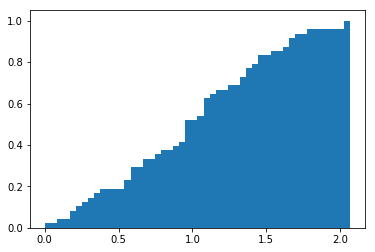

In [128]:
plt.hist(statistics.Max_Diff.abs(), bins=50, cumulative=True, normed=True);
statistics.Max_Diff.abs().describe()

> The average maximum error is 0.99, and 25% of the ratings yield a maximum error greater than or equal to 1.38

> <div class="alert alert-block alert-info"> When I refer to the ratings, I mean the range of possible ratings (3.3-8.3), not the predicted movie ratings. </div>

count    48.000000
mean      0.931652
std       0.483813
min       0.098865
25%       0.682485
50%       0.945322
75%       1.193224
max       2.063858
Name: Min_Diff, dtype: float64

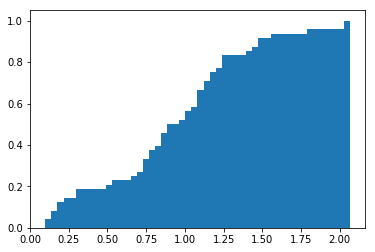

In [131]:
plt.hist(statistics.Min_Diff.abs(), bins=50, cumulative=True, normed=True)
statistics.Min_Diff.abs().describe()

> The average minimum error is 0.93, and 25% of the ratings yield a minimum error greater than or equal to 1.19.

> <div class="alert alert-block alert-info"> When I refer to the ratings, I mean the range of possible ratings (3.3-8.3), not the predicted movie ratings. </div>

count    48.000000
mean      1.076170
std       0.705181
min       0.000000
25%       0.611668
50%       1.103077
75%       1.671754
max       2.475400
Name: Range, dtype: float64

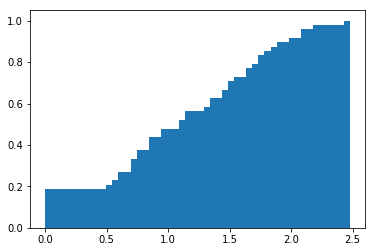

In [137]:
plt.hist(statistics.Range, bins=50, cumulative=True, normed=True)
statistics.Range.describe()

> The average range is about 1.076, and 25% of the ratings yield a range greater than or equal to 1.67.

> <div class="alert alert-block alert-info"> When I refer to the ratings, I mean the range of possible ratings (3.3-8.3), not the predicted movie ratings. </div>

<a id='conclusions'></a>
## Conclusions

WIP